In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions

IPythonConsole.ipython_useSVG = False
DrawingOptions.includeAtomNumbers=True

In [2]:
from molpher.core import ExplorationTree as ETree
from molpher.core import MolpherMol

captopril = MolpherMol("captopril.sdf")
tree = ETree.create(source=captopril)

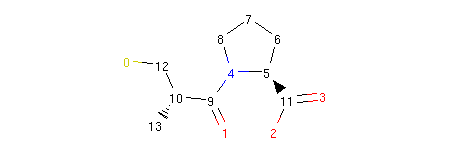

In [3]:
tree.leaves[0].asRDMol()

In [4]:
print('Source: ', tree.params['source'])

Source:  CC(CS)C(=O)N1CCCC1C(=O)O


In [5]:
tree.params

{'source': 'CC(CS)C(=O)N1CCCC1C(=O)O',
 'target': None,
 'operators': ('OP_ADD_ATOM',
  'OP_REMOVE_ATOM',
  'OP_ADD_BOND',
  'OP_REMOVE_BOND',
  'OP_MUTATE_ATOM',
  'OP_INTERLAY_ATOM',
  'OP_BOND_REROUTE',
  'OP_BOND_CONTRACTION'),
 'fingerprint': 'FP_MORGAN',
 'similarity': 'SC_TANIMOTO',
 'weight_min': 0.0,
 'weight_max': 100000.0,
 'accept_min': 50,
 'accept_max': 100,
 'far_produce': 80,
 'close_produce': 150,
 'far_close_threshold': 0.15,
 'max_morphs_total': 1500,
 'non_producing_survive': 5}

In [6]:
tree.params = {
    'non_producing_survive' : 2
    , 'weight_max' : 500.0
}
tree.params

{'source': 'CC(CS)C(=O)N1CCCC1C(=O)O',
 'target': None,
 'operators': ('OP_ADD_ATOM',
  'OP_REMOVE_ATOM',
  'OP_ADD_BOND',
  'OP_REMOVE_BOND',
  'OP_MUTATE_ATOM',
  'OP_INTERLAY_ATOM',
  'OP_BOND_REROUTE',
  'OP_BOND_CONTRACTION'),
 'fingerprint': 'FP_MORGAN',
 'similarity': 'SC_TANIMOTO',
 'weight_min': 0.0,
 'weight_max': 500.0,
 'accept_min': 50,
 'accept_max': 100,
 'far_produce': 80,
 'close_produce': 150,
 'far_close_threshold': 0.15,
 'max_morphs_total': 1500,
 'non_producing_survive': 2}

(<molpher.core.MolpherMol.MolpherMol at 0x7fa4e902d660>,)


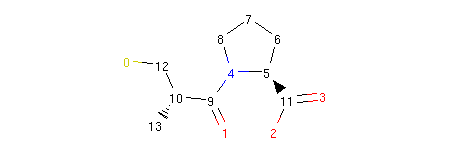

In [7]:
print(tree.leaves) # show the current leaves of the tree (only the source so far)
tree.leaves[0].asRDMol()

In [8]:
tree.generateMorphs()
print(len(tree.candidates))

23


In [9]:
{x.dist_to_target for x in tree.candidates}

{1.7976931348623157e+308}

In [10]:
def sascore_as_obj(morph, operator):
    morph.dist_to_target = morph.sascore
    
tree.generateMorphs([sascore_as_obj])
print(len(tree.candidates))
[x.dist_to_target for x in tree.candidates]

23


[3.8893996483733346,
 3.804751376555311,
 3.8501001628456333,
 3.613205289055311,
 3.9784865729838823,
 3.9938638051851627,
 3.9366697951036973,
 3.404002369297247,
 4.12966016352485,
 4.304767951403637,
 3.9220880467166013,
 3.3191105796423788,
 3.8871106534610247,
 4.076862613435724,
 4.161464339486345,
 4.210858601671017,
 4.208420345343031,
 3.9987225453430324,
 4.3714010271612125,
 4.027645567072552,
 4.242986776623579,
 3.916140148729842,
 4.190517829244547]

In [11]:
tree.sortMorphs()

[
    (x.smiles, x.dist_to_target)
    for idx,x in enumerate(tree.candidates)
]

[('CC(C)C(=O)N1CCCC1C(=O)O', 3.3191105796423788),
 ('CCC(C)C(=O)N1CCCC1C(=O)O', 3.404002369297247),
 ('CSCCC(=O)N1CCCC1C(=O)O', 3.613205289055311),
 ('CC(CS)C(=O)N1CCCC1C(=O)O', 3.804751376555311),
 ('CSC(C)C(=O)N1CCCC1C(=O)O', 3.8501001628456333),
 ('O=C(O)C1CCCN1C(=O)CCS', 3.8871106534610247),
 ('CCC(CS)C(=O)N1CCCC1C(=O)O', 3.8893996483733346),
 ('CSCC(C)C(=O)N1CCCC1C(=O)O', 3.916140148729842),
 ('O=C(O)C1CCCN1C(=O)CCCS', 3.9220880467166013),
 ('CC(S)CC(=O)N1CCCC1C(=O)O', 3.9366697951036973),
 ('O=C(O)C1CCCN1C(=O)C1CSC1', 3.9784865729838823),
 ('CC(S)C(=O)N1CCCC1C(=O)O', 3.9938638051851627),
 ('CC(CCS)C(=O)N1CCCC1C(=O)O', 3.9987225453430324),
 ('O=C(O)C1CCCN1C(=O)C(F)CS', 4.027645567072552),
 ('CC(NCS)C(=O)N1CCCC1C(=O)O', 4.076862613435724),
 ('NCC(CS)C(=O)N1CCCC1C(=O)O', 4.12966016352485),
 ('CC(C=S)C(=O)N1CCCC1C(=O)O', 4.161464339486345),
 ('O=C(O)C1CCCN1C(=O)C(CO)CS', 4.190517829244547),
 ('CC(CSCl)C(=O)N1CCCC1C(=O)O', 4.208420345343031),
 ('CC(SCS)C(=O)N1CCCC1C(=O)O', 4.210858601

In [12]:
# print the current candidates mask (all positions are on by default)
print("Old mask:", tree.candidates_mask)

# accept only the first ten morphs in the sorted list (those with the lowest distance to target)
new_mask = [True if idx < 10 else False for idx, x in enumerate(tree.candidates_mask)]

# save the new mask to the tree
tree.candidates_mask = new_mask

# show results
print("New mask:", tree.candidates_mask)
print("Molecules that passed the filter:")
[
    (x.smiles, x.dist_to_target)
    for idx,x in enumerate(tree.candidates)
    if tree.candidates_mask[idx] # get molecules that passed the filter only
]

Old mask: (True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True)
New mask: (True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False)
Molecules that passed the filter:


[('CC(C)C(=O)N1CCCC1C(=O)O', 3.3191105796423788),
 ('CCC(C)C(=O)N1CCCC1C(=O)O', 3.404002369297247),
 ('CSCCC(=O)N1CCCC1C(=O)O', 3.613205289055311),
 ('CC(CS)C(=O)N1CCCC1C(=O)O', 3.804751376555311),
 ('CSC(C)C(=O)N1CCCC1C(=O)O', 3.8501001628456333),
 ('O=C(O)C1CCCN1C(=O)CCS', 3.8871106534610247),
 ('CCC(CS)C(=O)N1CCCC1C(=O)O', 3.8893996483733346),
 ('CSCC(C)C(=O)N1CCCC1C(=O)O', 3.916140148729842),
 ('O=C(O)C1CCCN1C(=O)CCCS', 3.9220880467166013),
 ('CC(S)CC(=O)N1CCCC1C(=O)O', 3.9366697951036973)]

In [13]:
# get the number of generations before
print(tree.generation_count)

tree.extend() # connect the accepted morphs to the tree as new leaves

# get the number of generations after
print(tree.generation_count)

# grab the new leaves as a list sorted according to their distance from target
sorted(
    [
        (x.getSMILES(), x.getDistToTarget())
        for x in tree.leaves
    ], key=lambda item : item[1]
)

0
1


[('CC(C)C(=O)N1CCCC1C(=O)O', 3.3191105796423788),
 ('CCC(C)C(=O)N1CCCC1C(=O)O', 3.404002369297247),
 ('CSCCC(=O)N1CCCC1C(=O)O', 3.613205289055311),
 ('CSC(C)C(=O)N1CCCC1C(=O)O', 3.8501001628456333),
 ('O=C(O)C1CCCN1C(=O)CCS', 3.8871106534610247),
 ('CCC(CS)C(=O)N1CCCC1C(=O)O', 3.8893996483733346),
 ('CSCC(C)C(=O)N1CCCC1C(=O)O', 3.916140148729842),
 ('O=C(O)C1CCCN1C(=O)CCCS', 3.9220880467166013),
 ('CC(S)CC(=O)N1CCCC1C(=O)O', 3.9366697951036973)]

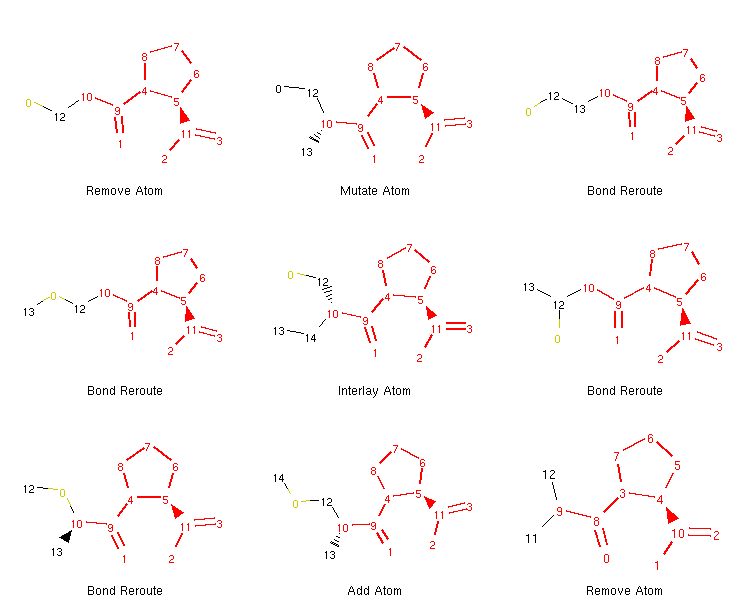

In [14]:
from rdkit.Chem.Draw import MolsToGridImage

def get_locked_atoms(mol):
    return [(idx, atm) for idx, atm in enumerate(mol.atoms) if atm.is_locked]

def show_mol_grid(mols):
    locked_atoms = [[y[0] for y in get_locked_atoms(x)] for x in mols]
    return MolsToGridImage(
        [x.asRDMol() for x in mols]
        , subImgSize=(250,200)
        , highlightAtomLists=locked_atoms
        , legends=[x.parent_operator for x in mols]
    )

show_mol_grid(tree.leaves)